In [1]:
import sys
print (sys.version)

3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 12:04:33) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


In [2]:
%matplotlib inline
import sys,os,shutil
#sys.path.insert(0,'/Users/sammymetref/Documents/Boost-Swot/Notebooks/GitHub/Personal_Files/2018/Scripts/2018-03-15-sm-qgsw-DI-master-modified/') 
import numpy as np
import matplotlib.pylab as plt
import time
import netCDF4 as nc
import qgsw
import modgrid

In [3]:
file='/Users/sammymetref/Documents/Boost-Swot/Notebooks/GitHub/Personal_Files/2018/Data/OSMOSIS/NATL60OSMO-CJM165_y2012m06d14-y2013m10d01.1d_SSHdegrad.nc'
fid = nc.Dataset(file)
lon2d=np.array(fid.variables["nav_lon"][:])
lat2d=np.array(fid.variables["nav_lat"][:])
SSH=np.array(fid.variables["degraded_sossheig"][:,:])

In [4]:

SSH_t0 = SSH[0,:,:]# Set constant Rossby first baroclinic phase speed to constant value
c=SSH_t0*0. + 2.5 # in m/s

tint=int(86400*5) # Time of propagator integration in seconds. Can be positive or negative
deltat=int(86400*1) # Time period of outputs
dt=600 # propagator time step

In [5]:
help(qgsw)

Help on module qgsw:

NAME
    qgsw

FUNCTIONS
    cos(...)
        cos(x)
        
        Return the cosine of x (measured in radians).
    
    isnan(...)
        isnan(x) -> bool
        
        Return True if x is a NaN (not a number), and False otherwise.
    
    qgsw(Hi=None, c=None, lon=None, lat=None, tint=None, dtout=None, dt=None, obsspace=None, Hm=None, rappel=None, snu=None)
        QG Shallow Water model
        
        Args:
            Hi (2D array): Initial SSH field.
            c (same size as Hi): Rossby first baroclinic phase speed
            lon (2D array): longitudes
            lat (2D array): latitudes
            tint (scalar): Time of propagator integration in seconds. Can be positive (forward integration) or negative (backward integration)
            dtout (scalar): Time period of outputs
            dt (scalar): Propagator time step
        
        Returns:
            SSH: 3D array with dimensions (timesteps, height, width), SSH forecast
    
    sin

In [6]:
Hf,trash=qgsw.qgsw(Hi=SSH_t0, c=c, lon=lon2d, lat=lat2d, tint=tint, dtout=deltat, dt=dt,rappel=None,snu=0.)

Hf.shape

(6, 301, 175)

In [7]:
from qgsw import modgrid
grdtst=modgrid.grid(SSH_t0, c, 0., lon2d, lat2d)

In [8]:
np.mean(-(grdtst.f0[3:-1,2:-2]-grdtst.f0[1:-3,2:-2])/(2*grdtst.dy[2:-2,2:-2]))
np.mean(grdtst.g/grdtst.f0[1:,1:-1]/grdtst.dx[1:,1:-1])
np.mean(grdtst.dy[2:-2,2:-2])

3787.262673025247

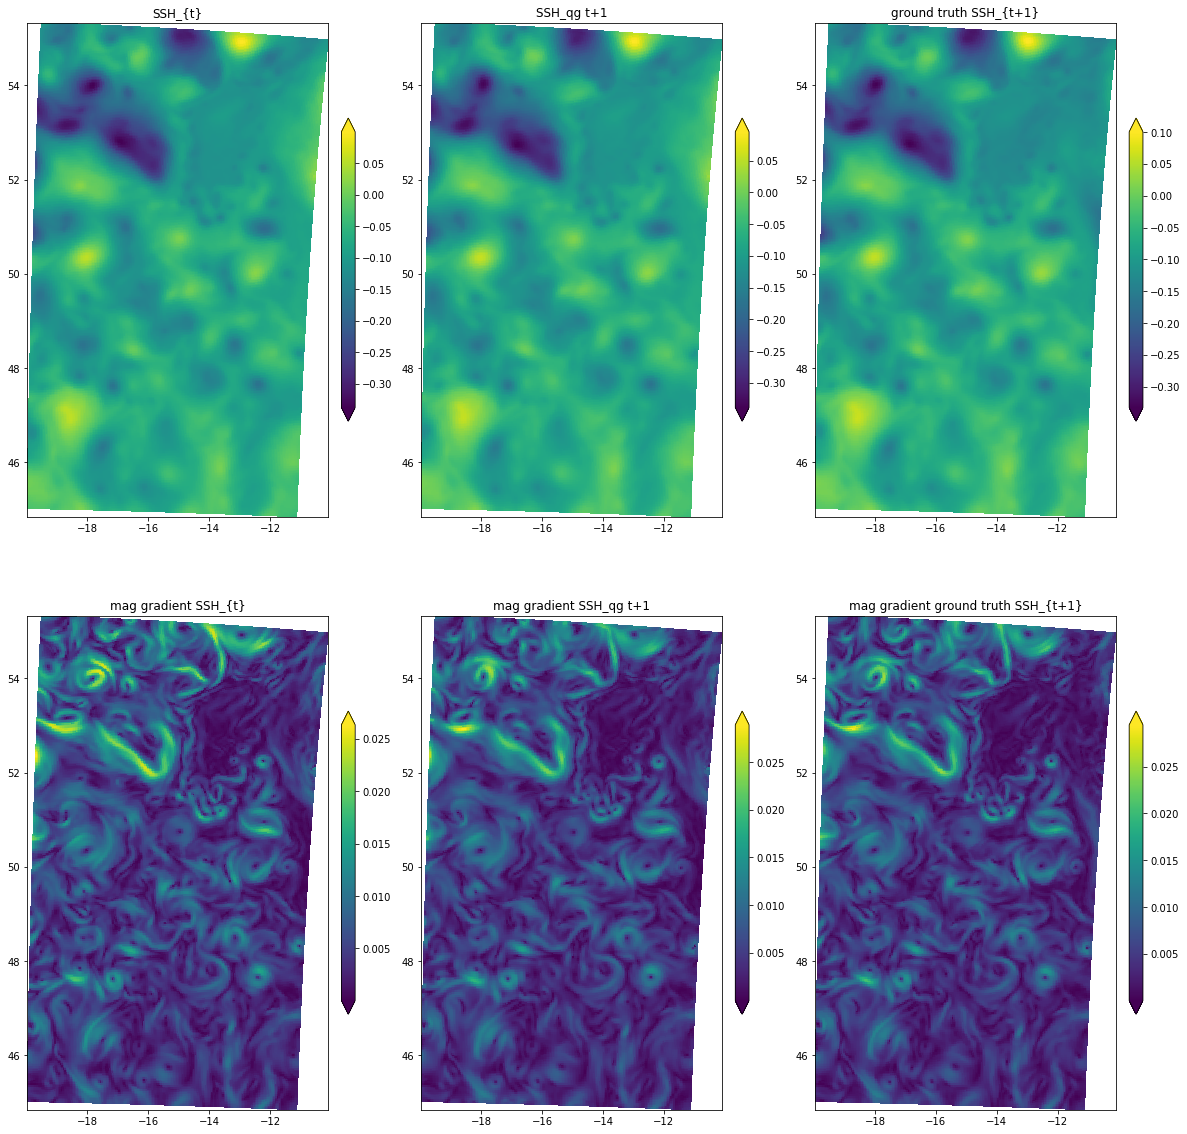

In [10]:
p = 1

plt.figure(figsize=(20, 20))

plt.subplot(231)
plt.pcolormesh(lon2d,lat2d,SSH[0,:,:])
plt.colorbar(extend='both', fraction=0.042, pad=0.04)
plt.title('SSH_{t}');

plt.subplot(232)
plt.pcolormesh(lon2d,lat2d,Hf[p,:,:])
plt.colorbar(extend='both', fraction=0.042, pad=0.04)
plt.title('SSH_qg t+1');

plt.subplot(233)
plt.pcolormesh(lon2d,lat2d,SSH[p,:,:])
plt.colorbar(extend='both', fraction=0.042, pad=0.04)
plt.title('ground truth SSH_{t+%s}'%p);

plt.subplot(234)
gradI0 = np.gradient(SSH_t0)
mag0 = np.sqrt(gradI0[0]**2 + gradI0[1]**2)
plt.pcolormesh(lon2d,lat2d,mag0)
plt.colorbar(extend='both', fraction=0.042, pad=0.04)
plt.title('mag gradient SSH_{t}');

plt.subplot(235)
gradI1 = np.gradient(Hf[p,:,:])
mag1 = np.sqrt(gradI1[0]**2 + gradI1[1]**2)
plt.pcolormesh(lon2d,lat2d,mag1)
plt.colorbar(extend='both', fraction=0.042, pad=0.04)
plt.title('mag gradient SSH_qg t+%s'%p);

plt.subplot(236)
gradI0 = np.gradient(SSH[p,:,:])
mag0 = np.sqrt(gradI0[0]**2 + gradI0[1]**2)
plt.pcolormesh(lon2d,lat2d,mag0)
plt.colorbar(extend='both', fraction=0.042, pad=0.04)
plt.title('mag gradient ground truth SSH_{t+%s}'%p);

In [10]:
from math import pi
tmp = 2*2*pi/86164*np.sin(lat2d*pi/180)
bbb = 9.81/(tmp)
print(bbb)
ccc = 9.81*tmp/(c**2)
print(ccc)
ddd = 9.81/(tmp**2)
print(ddd)
eee = 9.81/(c**2)
print(eee)

[[95089.71  95090.76  95091.836 ... 95376.81  95379.09  95381.39 ]
 [95028.83  95029.9   95030.97  ... 95316.414 95318.68  95320.984]
 [94968.1   94969.17  94970.24  ... 95256.13  95258.42  95260.73 ]
 ...
 [81850.13  81851.37  81852.63  ... 82209.3   82212.24  82215.2  ]
 [81818.266 81819.516 81820.766 ... 82177.484 82180.43  82183.4  ]
 [81786.48  81787.72  81788.98  ... 82145.74  82148.695 82151.65 ]]
[[0.00016193 0.00016193 0.00016193 ... 0.00016144 0.00016144 0.00016143]
 [0.00016203 0.00016203 0.00016203 ... 0.00016154 0.00016154 0.00016154]
 [0.00016214 0.00016213 0.00016213 ... 0.00016165 0.00016164 0.00016164]
 ...
 [0.00018812 0.00018812 0.00018812 ... 0.0001873  0.00018729 0.00018729]
 [0.00018819 0.00018819 0.00018819 ... 0.00018737 0.00018737 0.00018736]
 [0.00018827 0.00018827 0.00018826 ... 0.00018744 0.00018744 0.00018743]]
[[9.2171802e+08 9.2173824e+08 9.2175910e+08 ... 9.2729216e+08
  9.2733651e+08 9.2738118e+08]
 [9.2053805e+08 9.2055872e+08 9.2057946e+08 ... 9.26118

In [11]:
qgubelmann_5 = np.zeros(SSH.shape)

for i in range(len(SSH)):
    Hf,trash=qgsw.qgsw(Hi=SSH[i,:,:], c=c, lon=lon2d, lat=lat2d, tint=tint, dtout=deltat, dt=dt,rappel=None,snu=0.)
    qgubelmann_5[i,:,:]=Hf[5,:,:]

KeyboardInterrupt: 

In [ ]:
qgubelmann.shape

In [41]:
np.save('SSH_natl60_qgubelmann_5.npy', qgubelmann_5)

In [57]:
from modelliptic import h2pv

qgubelmann_sshtoq = np.zeros(SSH.shape)

for i in range(len(SSH)):
    q,=h2pv(SSH[i,:,:], grdtst)
    qgubelmann_sshtoq[i,:,:]=q
    
#np.save('modelliptic_h2pv.npy', qgubelmann_sshtoq)

In [74]:
from moddyn import h2uv,qrhs
from modelliptic import pv2h

qgubelmann_forecastq = np.zeros(SSH.shape)

nstep=int(abs(86400*1)/dt)
stepout=int(deltat/dt)

for i in range(len(SSH)):
    h = SSH[i,:,:]
    q,= h2pv(h,grdtst)
    hb=+h # just for hguess
    
    for step in range(nstep): 
        #init
        hguess=2*h-hb
        hb=+h
        qb=+q
        #forecasting
        # 1/ 
        u,v, = h2uv(h,grdtst)

        # 2/
        rq, = qrhs(u,v,qb,grdtst,np.sign(tint))

        # 3/    
        q = qb + dt*rq

        # 4/
        h,=pv2h(q,hguess,grdtst)
    
    #save
    qgubelmann_forecastq[i,:,:]=q
            
np.save('modeldyn_forecastq.npy', qgubelmann_forecastq)

In [10]:
from moddyn import h2uv,qrhs
from modelliptic import pv2h, h2pv

qgubelmann_forecastq_blockdt600 = np.zeros(SSH.shape)

for i in range(len(SSH)):
    h = SSH[i,:,:]
    q,= h2pv(h,grdtst)
    hb=+h # just for hguess
    
    for step in range(1): 
        print(i)
        #init
        hguess=2*h-hb
        hb=+h
        qb=+q
        #forecasting
        # 1/ 
        u,v, = h2uv(h,grdtst)

        # 2/
        rq, = qrhs(u,v,qb,grdtst,np.sign(tint))

        # 3/    
        q = qb + dt*rq
    
    #save
    qgubelmann_forecastq_blockdt600[i,:,:]=q
            
np.save('modeldyn_forecastq_blockdt600.npy', qgubelmann_forecastq_blockdt600)

0


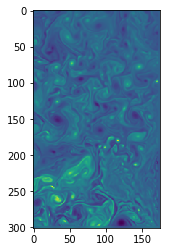

In [11]:
plt.imshow(qgubelmann_forecastq_blockdt600[0,:,:])